<a href="https://colab.research.google.com/github/educhel/L03_Data_Analysis/blob/main/0115_%EA%B0%95%EC%9D%98%EC%A7%84%ED%96%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

복습
===

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

os.chdir('/content/drive/MyDrive/새싹2기/데이터분석/data')

## [1] 데이터 요약하기

In [ ]:
# 데이터 불러오기
import pandas as pd

tips = pd.read_csv('tips.csv')

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
tips.shape

(244, 7)

In [ ]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,int64


In [ ]:
# 결측치 확인 -> 처리

tips.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
# 이상치 확인
# 이상치 평가 -> 이상치 X
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


<Axes: >

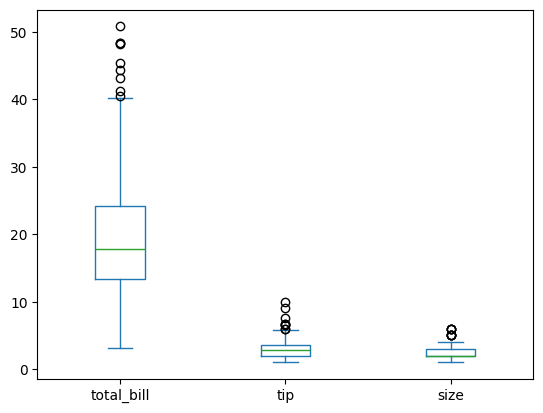

In [ ]:
tips.plot.box()

In [ ]:
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


In [ ]:
tips['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [ ]:
tips['day'] = pd.Categorical(tips['day'],
                            categories=['Thur', 'Fri','Sat','Sun'])

In [ ]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,category
time,object
size,int64


[1] 데이터 요약하기

`기준`이 될 수 있는 컬럼은? 수치형이 아님
-> 기준으로 그룹을 나누는 것이 의미가 있으려면, 특정한 범주에 속해 있어야!


In [ ]:
# 곤란하다!
# 그룹을 tip을 기준으로 나누는 것이 의미가 없다.
tips.groupby(by=['tip'])['total_bill'].mean()

,total_bill
tip,
1.00,7.167500
1.01,16.990000
1.10,12.900000
1.17,32.830000
1.25,9.696667
...,...
6.70,34.300000
6.73,48.270000
7.58,39.420000


In [ ]:
# step1 : 기준으로 그룹 분할
# 그룹을 나누기만 하면, 우리는 직접 볼 수 없다.
tips.groupby(['sex','day'],observed=True)

In [ ]:
# step 2: 함수 적용

tips.groupby(['sex','day'],observed=True)['total_bill'].mean()

sex     day 
Female  Thur    16.715312
        Fri     14.145556
        Sat     19.680357
        Sun     19.872222
Male    Thur    18.714667
        Fri     19.857000
        Sat     20.802542
        Sun     21.887241
Name: total_bill, dtype: float64

> groupby 기본
- 결합되어 나온 테이블은 그룹별로 요약(집계함수 적용)된 값을 가지고 있는다.

In [ ]:
# 인간이 보기 편한 형태로 만든다.
tips.groupby(['sex','day'],observed=True)['total_bill'].mean().unstack()

day,Thur,Fri,Sat,Sun
sex,,,,
Female,16.715312,14.145556,19.680357,19.872222
Male,18.714667,19.857000,20.802542,21.887241


groupby의 결과 몇 개의 그룹에서 평균 지불 금액이 나올 것인가?

In [ ]:
tips['sex'].nunique() * tips['day'].nunique()

8

In [ ]:
tips.groupby(['sex','day']).size()

/tmp/ipython-input-3526880888.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['sex','day']).size()


sex     day 
Female  Thur    32
        Fri      9
        Sat     28
        Sun     18
Male    Thur    30
        Fri     10
        Sat     59
        Sun     58
dtype: int64

In [ ]:
#

tips.groupby(['smoker','day']).agg({'total_bill':'mean',
                                    'tip':'max',
                                    'size':'size'})

/tmp/ipython-input-3383247693.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips.groupby(['smoker','day']).agg({'total_bill':'mean',


total_bill    tip  size
smoker day                          
No     Thur   17.113111   6.70    45
       Fri    18.420000   3.50     4
       Sat    19.661778   9.00    45
       Sun    20.506667   6.00    57
Yes    Thur   19.190588   5.00    17
       Fri    16.813333   4.73    15
       Sat    21.276667  10.00    42
       Sun    24.120000   6.50    19

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### (1) filter : 특정 그룹만 남기기

In [ ]:
# 목적 : 그룹의 특정 요약값(평균,길이...)을 기준으로 원본 데이터 프레임 필터링
# 반환값 : 원본 데이터 프레임의 일부 (그룹별로 확인한 조건 조건을 만족하는 행 선택)

tips.groupby(['sex','day'],observed=True).filter(lambda group:group['tip'].mean() > 3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [ ]:
tips.groupby(['sex','day'],observed=True)['tip'].mean()

sex     day 
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Name: tip, dtype: float64

### (2) transform : 그룹 기준 값으로 컬럼 추가

In [ ]:
# 목적 : 그룹 기준 요약 값을 원본 데이터 프레임 사이즈로 반환
# 반환값 : 각 행별 해당하는 요약값을 지닌 시리즈

tips['total_bill_avg_by_smk'] = tips.groupby('smoker')['total_bill'].transform('mean')

In [ ]:
tips['total_bill_avg_by_smk']

,total_bill_avg_by_smk
0,19.188278
1,19.188278
2,19.188278
3,19.188278
4,19.188278
...,...
239,19.188278
240,20.756344
241,20.756344
242,19.188278


## [2] 데이터 합치기

### (1) concat : 연결하기

In [ ]:
tips.dtypes

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,category
time,object
size,int64
total_bill_avg_by_smk,float64


In [ ]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size',
       'total_bill_avg_by_smk'],
      dtype='object')

In [ ]:
df = pd.DataFrame({'total_bill':[100, 40, 10, 50],
                   'tip':[20, 10, 1, 5],
                   'sex':['male','male','male','female'],
                   'day':['Sun','Mon','Mon','Tue']})

In [ ]:
df

,total_bill,tip,sex,day
0,100,20,male,Sun
1,40,10,male,Mon
2,10,1,male,Mon
3,50,5,female,Tue


In [ ]:
# 행 방향 (위 아래 연결)
# 기준 : 값을 해석하지 않고, 컬럼명이 같으면 가져가다 붙인다.

# 1. 연결할 때, 컬럼이 없다면 결측이 발생한다.
# 2. 행의 이름을 그대로 사용하여 연결된다.

tips_cocat = pd.concat([tips,df])

In [ ]:
tips_cocat.dtypes

# 연결하면서, 자료형이 변할 수도 있다.

,0
total_bill,float64
tip,float64
sex,object
smoker,object
day,object
time,object
size,float64
total_bill_avg_by_smk,float64


### (2) merge : 병합하기

`pd.merge(left, right, on='key', how='inner')`

생긴것만 다르지 작동되는 것은 똑같다.  
`left_df.merge(right_df, on='key',how='inner')`

In [ ]:
# 요일 정보 테이블 생성
df_day = pd.DataFrame({
    'day': ['Mon','Tue','Wed','Thur', 'Fri', 'Sat', 'Sun'],
    'promotion': ['Yes','No','No','No', 'Yes', 'Yes', 'No']
})
df_day

,day,promotion
0,Mon,Yes
1,Tue,No
2,Wed,No
3,Thur,No
4,Fri,Yes
5,Sat,Yes
6,Sun,No


In [ ]:
tips_merge = pd.merge(tips,df_day,
                        on='day',
                        how='inner')
tips_merge

,total_bill,tip,sex,smoker,day,time,size,total_bill_avg_by_smk,promotion
0,16.99,1.01,Female,No,Sun,Dinner,2,19.188278,No
1,10.34,1.66,Male,No,Sun,Dinner,3,19.188278,No
2,21.01,3.50,Male,No,Sun,Dinner,3,19.188278,No
3,23.68,3.31,Male,No,Sun,Dinner,2,19.188278,No
4,24.59,3.61,Female,No,Sun,Dinner,4,19.188278,No
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,19.188278,Yes
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.756344,Yes
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.756344,Yes
242,17.82,1.75,Male,No,Sat,Dinner,2,19.188278,Yes


In [ ]:
pd.merge(tips,df_day,
         on='day',
         how='left')

,total_bill,tip,sex,smoker,day,time,size,total_bill_avg_by_smk,promotion
0,16.99,1.01,Female,No,Sun,Dinner,2,19.188278,No
1,10.34,1.66,Male,No,Sun,Dinner,3,19.188278,No
2,21.01,3.50,Male,No,Sun,Dinner,3,19.188278,No
3,23.68,3.31,Male,No,Sun,Dinner,2,19.188278,No
4,24.59,3.61,Female,No,Sun,Dinner,4,19.188278,No
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,19.188278,Yes
240,27.18,2.00,Female,Yes,Sat,Dinner,2,20.756344,Yes
241,22.67,2.00,Male,Yes,Sat,Dinner,2,20.756344,Yes
242,17.82,1.75,Male,No,Sat,Dinner,2,19.188278,Yes


In [ ]:
pd.merge(tips,df_day,
         on='day',
         how='right')

,total_bill,tip,sex,smoker,day,time,size,total_bill_avg_by_smk,promotion
0,NaN,NaN,NaN,NaN,Mon,NaN,NaN,NaN,Yes
1,NaN,NaN,NaN,NaN,Tue,NaN,NaN,NaN,No
2,NaN,NaN,NaN,NaN,Wed,NaN,NaN,NaN,No
3,27.20,4.0,Male,No,Thur,Lunch,4.0,19.188278,No
4,22.76,3.0,Male,No,Thur,Lunch,2.0,19.188278,No
...,...,...,...,...,...,...,...,...,...
242,20.90,3.5,Female,Yes,Sun,Dinner,3.0,20.756344,No
243,30.46,2.0,Male,Yes,Sun,Dinner,5.0,20.756344,No
244,18.15,3.5,Female,Yes,Sun,Dinner,3.0,20.756344,No
245,23.10,4.0,Male,Yes,Sun,Dinner,3.0,20.756344,No


In [ ]:
pd.merge(tips,df_day,
         on='day',
         how='outer')

,total_bill,tip,sex,smoker,day,time,size,total_bill_avg_by_smk,promotion
0,28.97,3.00,Male,Yes,Fri,Dinner,2.0,20.756344,Yes
1,22.49,3.50,Male,No,Fri,Dinner,2.0,19.188278,Yes
2,5.75,1.00,Female,Yes,Fri,Dinner,2.0,20.756344,Yes
3,16.32,4.30,Female,Yes,Fri,Dinner,2.0,20.756344,Yes
4,22.75,3.25,Female,No,Fri,Dinner,2.0,19.188278,Yes
...,...,...,...,...,...,...,...,...,...
242,20.53,4.00,Male,Yes,Thur,Lunch,4.0,20.756344,No
243,16.47,3.23,Female,Yes,Thur,Lunch,3.0,20.756344,No
244,18.78,3.00,Female,No,Thur,Dinner,2.0,19.188278,No
245,NaN,NaN,NaN,NaN,Tue,NaN,NaN,NaN,No


In [ ]:
tips_merge.groupby(['promotion','time'])[['total_bill','tip','size']].agg({'total_bill':'mean',
                                                                    'tip':'mean',
                                                                    'size':'size'})

total_bill       tip  size
promotion time                              
No        Dinner   21.375844  3.251818    77
          Lunch    17.664754  2.767705    61
Yes       Dinner   20.347071  2.986667    99
          Lunch    12.845714  2.382857     7

# [3] 데이터 재구조화

### (1) melt : wide -> long

In [ ]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,total_bill_avg_by_smk
0,16.99,1.01,Female,No,Sun,Dinner,2,19.188278
1,10.34,1.66,Male,No,Sun,Dinner,3,19.188278
2,21.01,3.50,Male,No,Sun,Dinner,3,19.188278
3,23.68,3.31,Male,No,Sun,Dinner,2,19.188278
4,24.59,3.61,Female,No,Sun,Dinner,4,19.188278


In [ ]:
tips.melt(id_vars=['sex','smoker','day'],
          value_vars=['total_bill','tip'],
          var_name='type',
          value_name='amount')

,sex,smoker,day,type,amount
0,Female,No,Sun,total_bill,16.99
1,Male,No,Sun,total_bill,10.34
2,Male,No,Sun,total_bill,21.01
3,Male,No,Sun,total_bill,23.68
4,Female,No,Sun,total_bill,24.59
...,...,...,...,...,...
483,Male,No,Sat,tip,5.92
484,Female,Yes,Sat,tip,2.00
485,Male,Yes,Sat,tip,2.00
486,Male,No,Sat,tip,1.75


### (2) pivot_table : long -> wide (중복O/집계)

In [ ]:
tips.pivot_table(index='sex',
                 columns='day',
                 values='tip',
                 aggfunc='mean',
                 observed=True)

day,Thur,Fri,Sat,Sun
sex,,,,
Female,2.575625,2.781111,2.801786,3.367222
Male,2.980333,2.693000,3.083898,3.220345


### (3) unstack : long -> wide (멀티인덱스)

In [ ]:
tips.groupby(['sex','day'],observed=True)['tip'].mean().unstack()

day,Thur,Fri,Sat,Sun
sex,,,,
Female,2.575625,2.781111,2.801786,3.367222
Male,2.980333,2.693000,3.083898,3.220345


In [ ]:
tips.groupby(['sex','day'],observed=True)['tip'].mean()

sex     day 
Female  Thur    2.575625
        Fri     2.781111
        Sat     2.801786
        Sun     3.367222
Male    Thur    2.980333
        Fri     2.693000
        Sat     3.083898
        Sun     3.220345
Name: tip, dtype: float64

데이터 시각화하기
===

In [ ]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 52.5 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

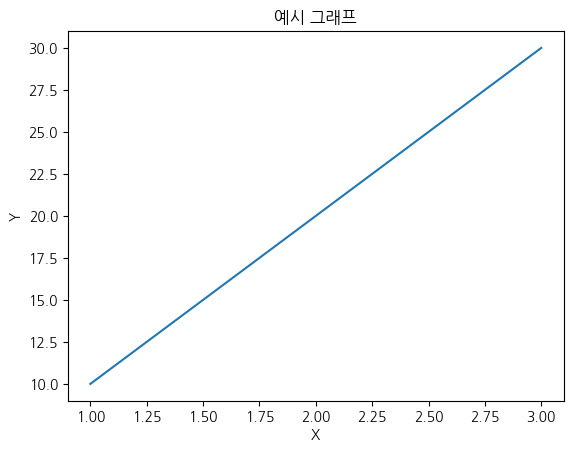

In [ ]:
# matplotlib으로 저수준 그래프 생성
fig, ax = plt.subplots()

ax.plot([1,2,3], [10,20,30])
ax.set_title("예시 그래프")
ax.set_xlabel("X")
ax.set_ylabel("Y")

plt.show()

Text(0.5, 1.0, '타이틀')

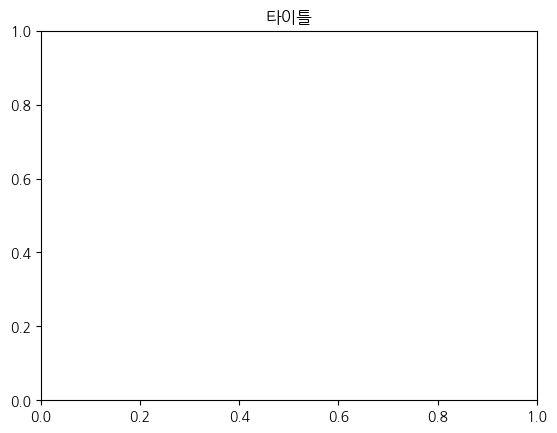

In [ ]:
plt.title('타이틀')

Text(0.5, 0, '요일')

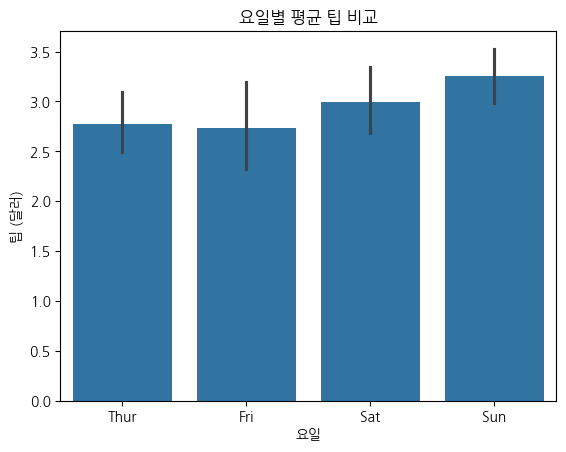

In [ ]:
ax = sns.barplot(data=tips, x='day',y='tip')
ax.set_title('요일별 평균 팁 비교')
ax.set_ylabel('팁 (달러)')
ax.set_xlabel('요일')

## [1] 관계형 데이터

### (1) scatter plot

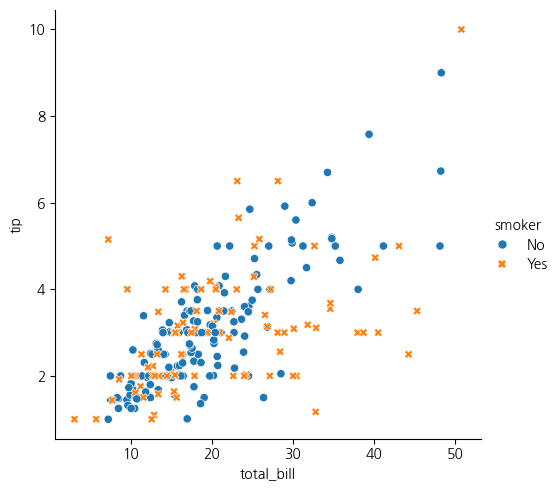

In [ ]:
# figure level
sns.relplot(data=tips,x='total_bill',y='tip',
            kind='scatter', # 기본
            hue='smoker',style='smoker') # 추가 설정

Text(0, 0.5, '팁 (달러)')

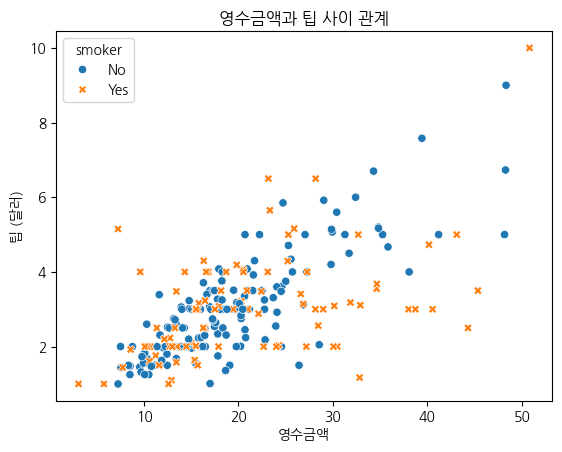

In [ ]:
# axes level
ax = sns.scatterplot(data=tips,x='total_bill',y='tip',
                    hue='smoker',style='smoker')
ax.set_title('영수금액과 팁 사이 관계')
ax.set_xlabel('영수금액')
ax.set_ylabel('팁 (달러)')

### (2) line plot

In [ ]:
fmri = sns.load_dataset('fmri')

In [ ]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [ ]:
fmri.dtypes

,0
subject,object
timepoint,int64
event,object
region,object
signal,float64


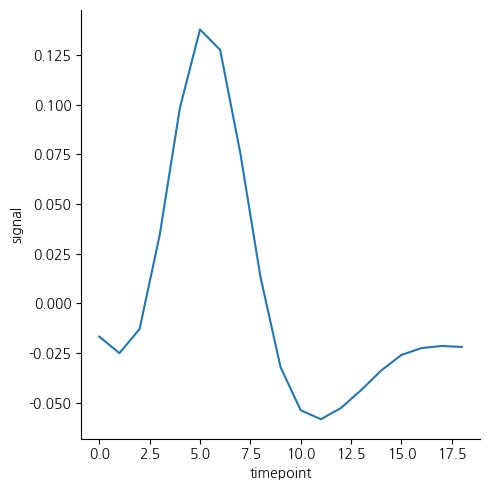

In [ ]:
# figure level

sns.relplot(data=fmri, kind='line',
            x='timepoint',y='signal',
            estimator='mean', # 여러개가 들어왔을 때, 추정하는 방법
            errorbar=None # 여러개가 들어 왔을 때, 그 면적도 보여줌
            )

In [ ]:
fmri[fmri['timepoint'] == 18]

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
5,s9,18,stim,parietal,-0.103513
6,s8,18,stim,parietal,-0.064408
7,s7,18,stim,parietal,-0.060526
8,s6,18,stim,parietal,-0.007029
9,s5,18,stim,parietal,-0.040557
10,s4,18,stim,parietal,-0.048812


<Axes: xlabel='timepoint'>

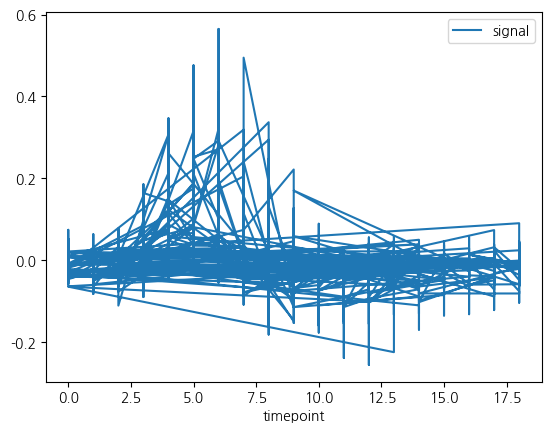

In [ ]:
# 잘못된 예제
fmri.plot.line(x='timepoint',y='signal')

<Axes: xlabel='timepoint'>

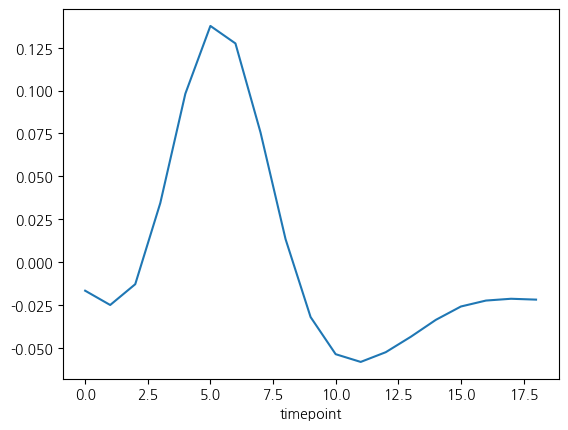

In [ ]:
fmri.groupby('timepoint')['signal'].mean().plot.line()

<Axes: xlabel='timepoint', ylabel='signal'>

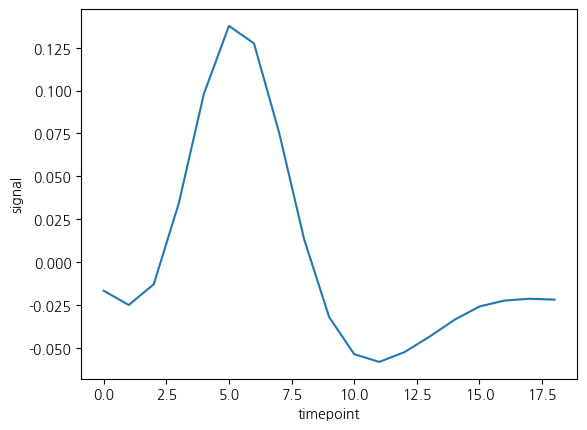

In [ ]:
# axes level
sns.lineplot(data=fmri,
            x='timepoint',y='signal',
            estimator='mean', # 여러개가 들어왔을 때, 추정하는 방법
            errorbar=None # 여러개가 들어 왔을 때, 그 면적도 보여줌
            )

### (3) 다중 시각화

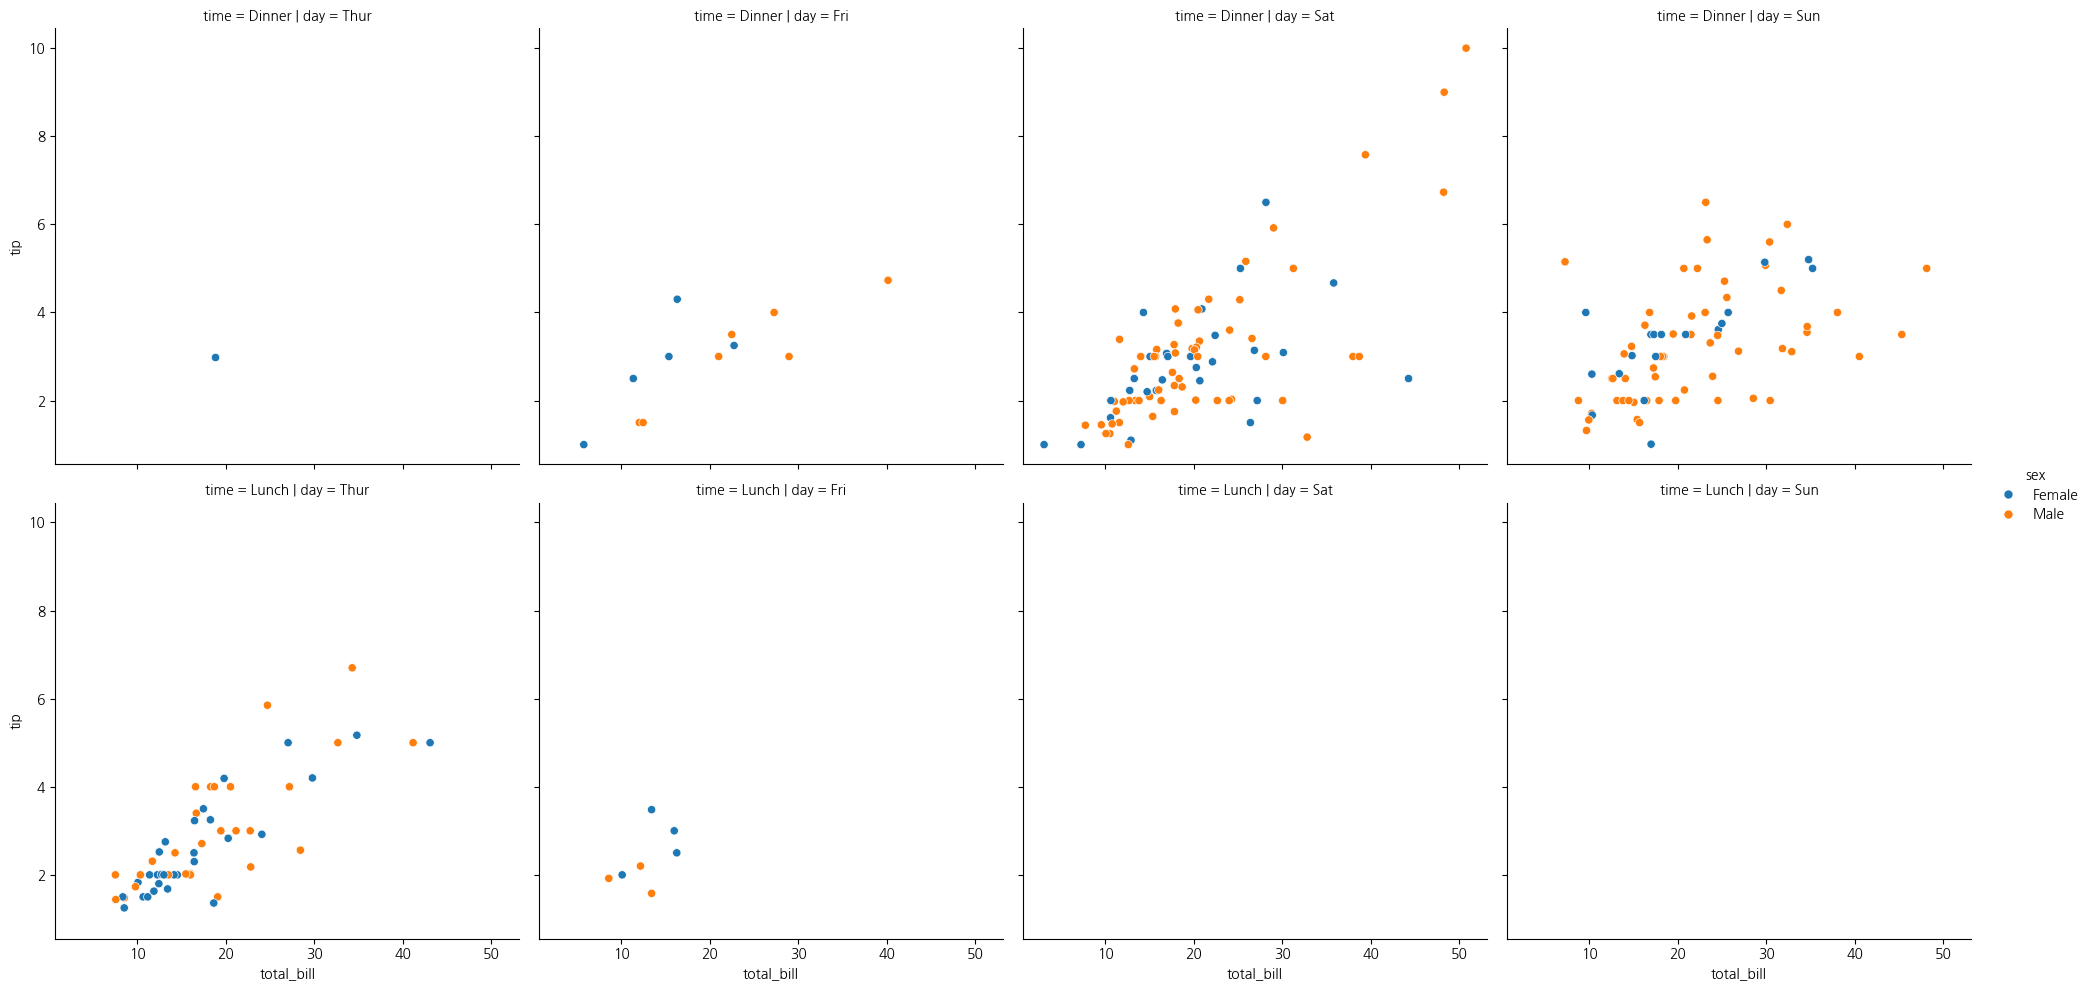

In [ ]:
sns.relplot(data=tips, x='total_bill',y='tip',
            kind='scatter',hue='sex',
            row='time', col='day')

## [2] 분포형 데이터
`sns.displot()`

In [ ]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


![img](https://cdn.blot.im/blog_a11fcc1a03b8427687759780d58b9179/_image_cache/44ceb927-d472-4c18-98ec-fe788a6eff2d.png)

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins['species'].value_counts()

,count
species,
Adelie,152
Gentoo,124
Chinstrap,68


### (1) histplot

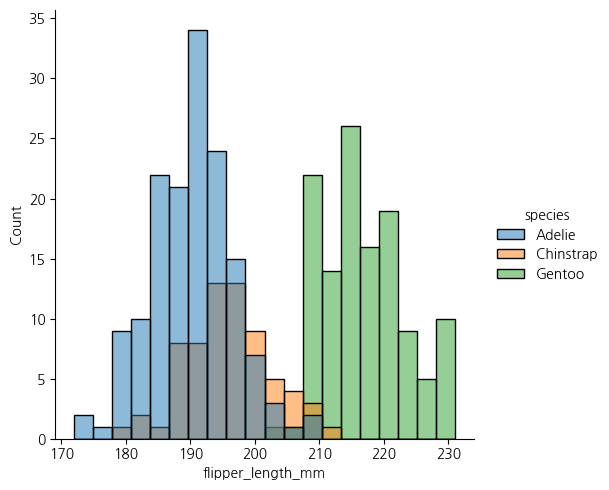

In [ ]:
sns.displot(data=penguins,kind='hist',x='flipper_length_mm',
            hue='species',bins=20)

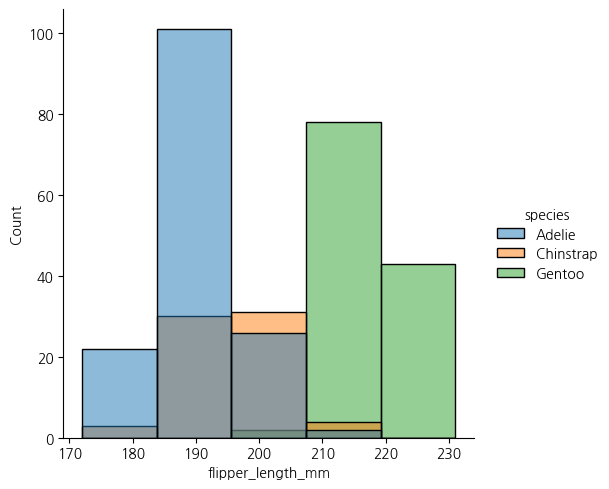

In [ ]:
sns.displot(data=penguins,kind='hist',x='flipper_length_mm',
            hue='species',bins=5)

In [ ]:
penguins_ol = penguins.copy()

In [ ]:
penguins_ol.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [ ]:
penguins_ol.loc[1,'bill_length_mm'] = 10000

In [ ]:
penguins_ol.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,10000.0,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


<Axes: xlabel='bill_length_mm', ylabel='Count'>

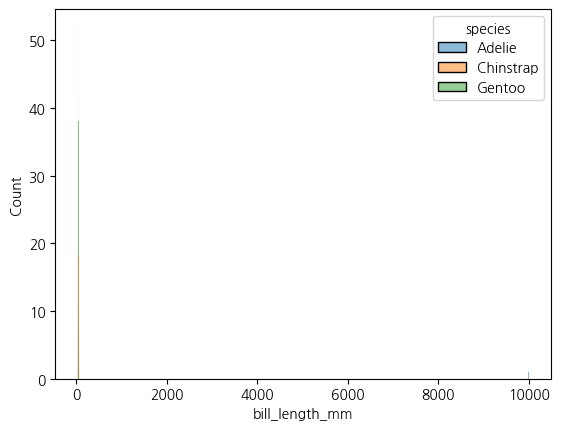

In [ ]:
# 이상치가 있는 경우, 정확한 정보를 표현하지 못한다.
sns.histplot(data=penguins_ol, x='bill_length_mm', hue='species')

### (2) kde plot

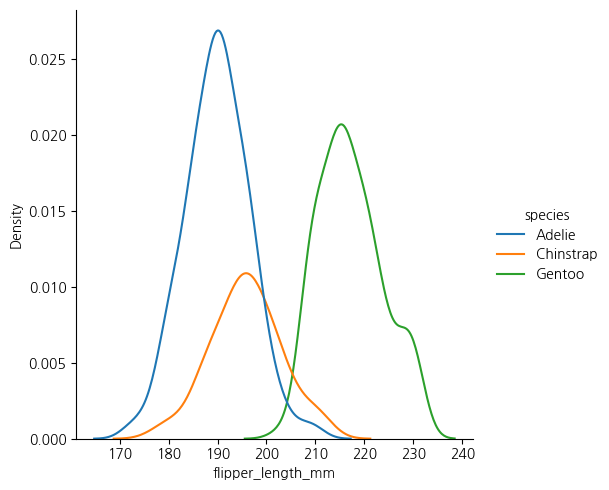

In [ ]:
sns.displot(data=penguins, x='flipper_length_mm',kind='kde',hue='species')

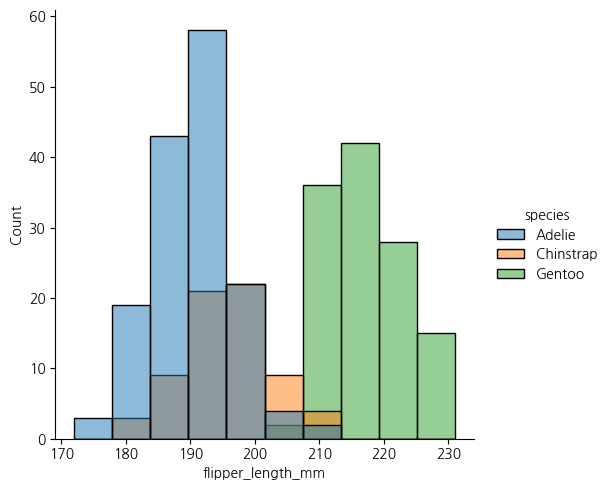

In [ ]:
sns.displot(data=penguins, x='flipper_length_mm',kind='hist',hue='species')

In [ ]:
penguins.shape

(344, 7)

### (3) rugplot

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

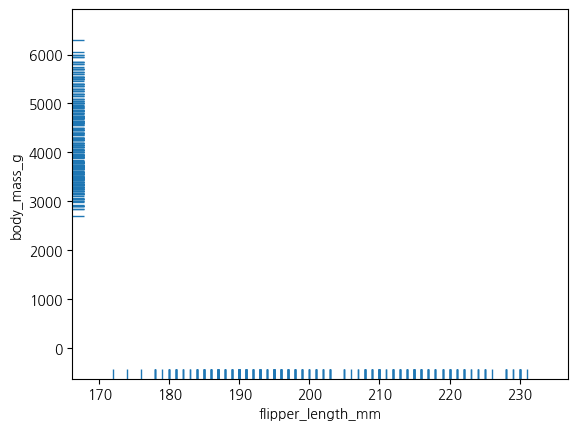

In [ ]:
# rugplot은 보조적인 수단!
sns.rugplot(data=penguins, x='flipper_length_mm')

<Axes: xlabel='flipper_length_mm', ylabel='body_mass_g'>

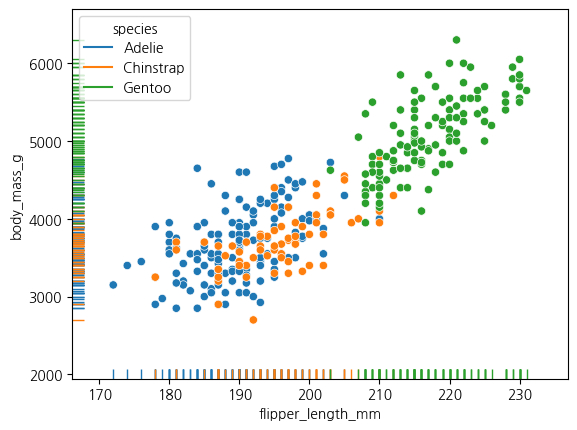

In [ ]:
# axes level 상에서는 겹쳐서 보여줄 수 있다.
sns.scatterplot(data=penguins, x='flipper_length_mm',y='body_mass_g',hue='species') # 관계형 그래프
sns.rugplot(data=penguins, x='flipper_length_mm',y='body_mass_g',hue='species') # 분포형 그래프 -> rug 추가

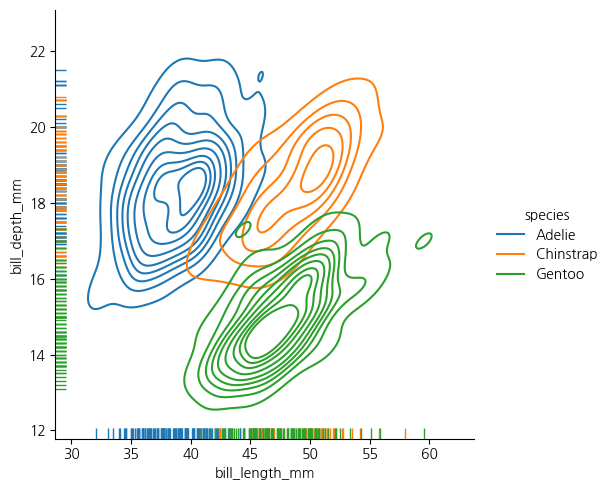

In [ ]:
sns.displot(data=penguins, x='bill_length_mm',y='bill_depth_mm',
            kind='kde',rug=True, hue='species')

## [3] 범주형 데이터

### (1) bar plot

sns.catplot(kind='bar')
sns.barplot()

In [ ]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='sex'>

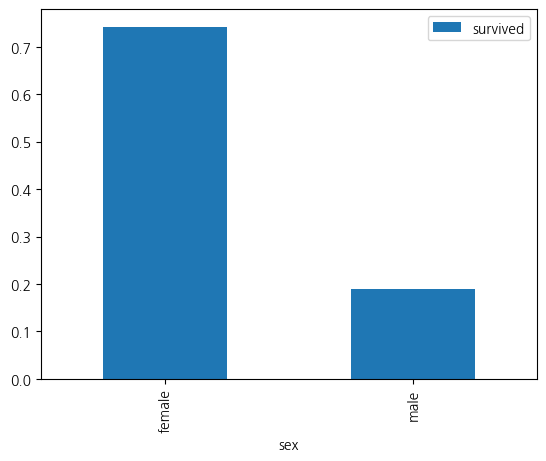

In [ ]:
# 기존 방식 - 복잡하다!
titanic.groupby('sex')['survived'].mean().reset_index().plot.bar(x='sex',y='survived')

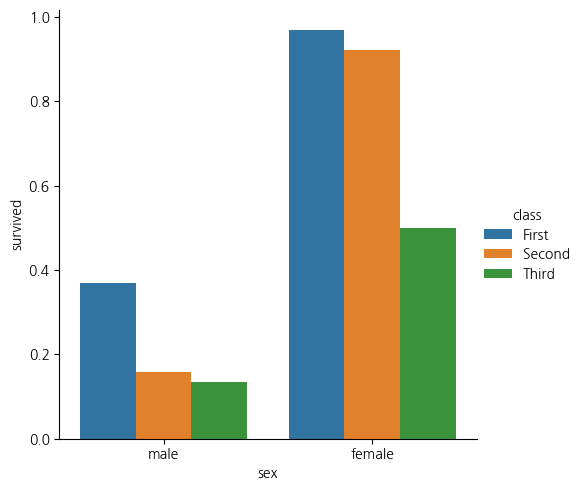

In [ ]:
sns.catplot(data=titanic, x='sex', y='survived', kind='bar',
            estimator='mean',errorbar=None, hue='class')

### (2) catplot

<Axes: ylabel='deck'>

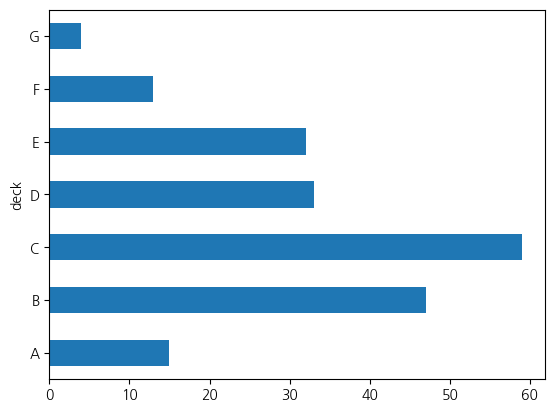

In [ ]:
titanic['deck'].value_counts(sort=False).plot.barh()

<Axes: xlabel='count', ylabel='deck'>

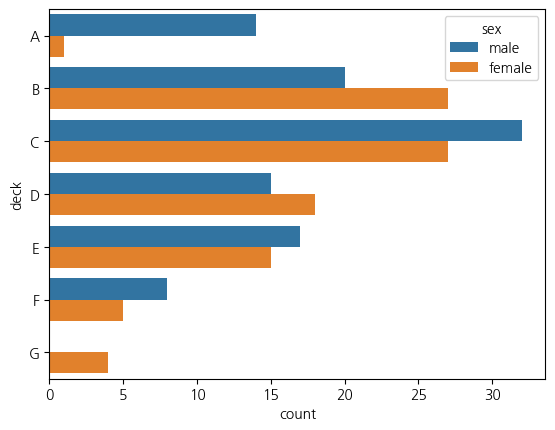

In [ ]:
sns.countplot(data=titanic, y='deck', hue='sex')

<Axes: xlabel='count', ylabel='age'>

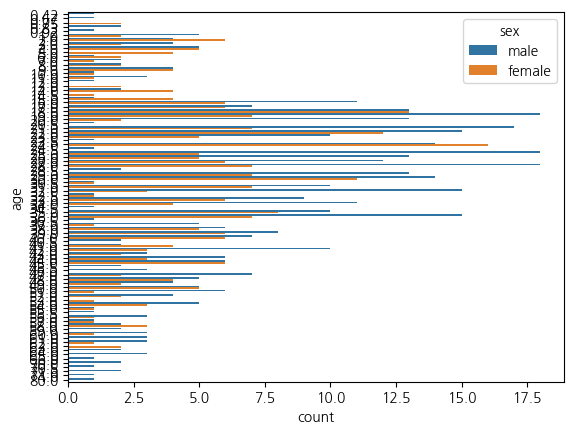

In [ ]:
# 이렇게 되지 않도록 주의할 것!
# 수치형 변수 age를 범주형처럼 사용
sns.countplot(data=titanic, y='age', hue='sex')

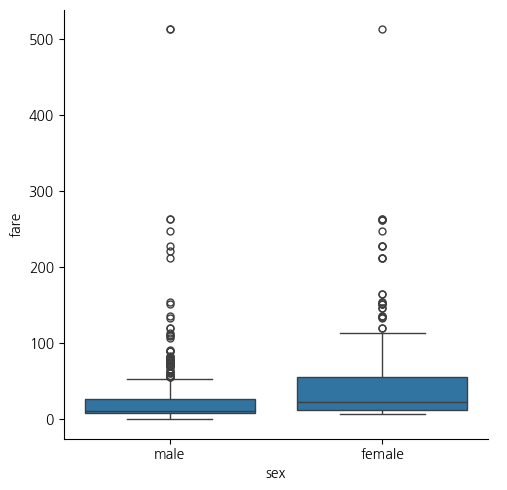

In [ ]:
sns.catplot(data=titanic, kind='box',
            x='sex', y='fare')

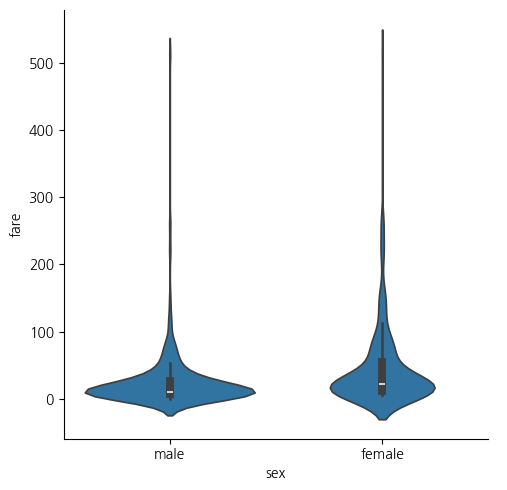

In [ ]:
sns.catplot(data=titanic, kind='violin',
            x='sex',y='fare')

## [3] 기타

In [ ]:
gb = titanic.groupby(['class']).agg({'survived':'mean',
                                'fare':'mean',
                                'age':'max',
                                'sex':'size'}).rename({'sex':'size'},axis=1)

gb

/tmp/ipython-input-1401630569.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gb = titanic.groupby(['class']).agg({'survived':'mean',


,survived,fare,age,size
class,,,,
First,0.629630,84.154687,80.0,216
Second,0.472826,20.662183,70.0,184
Third,0.242363,13.675550,74.0,491


### (1) heatmap

<Axes: ylabel='class'>

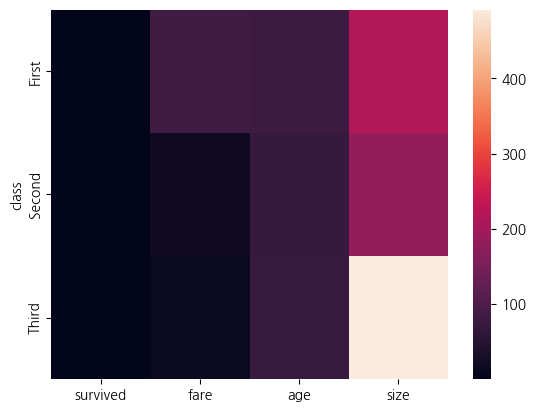

In [ ]:
sns.heatmap(gb)

<Axes: >

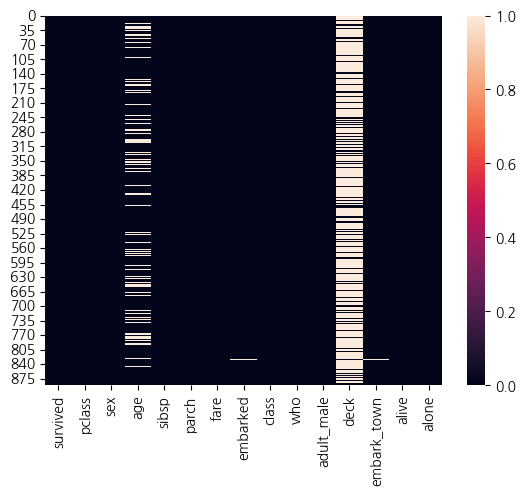

In [ ]:
sns.heatmap(titanic.isnull())

<Axes: >

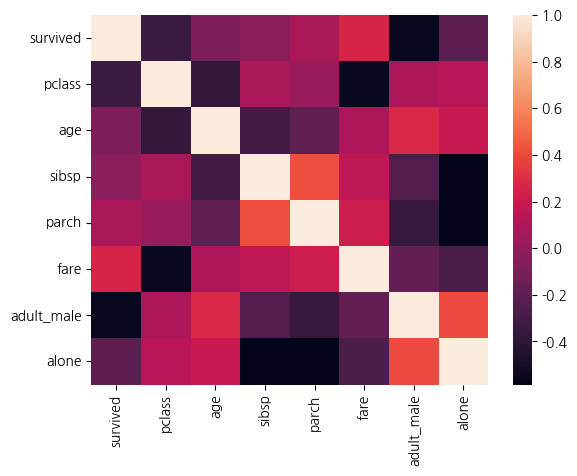

In [ ]:
sns.heatmap(titanic.corr(numeric_only=True))

<Axes: xlabel='survived', ylabel='sex'>

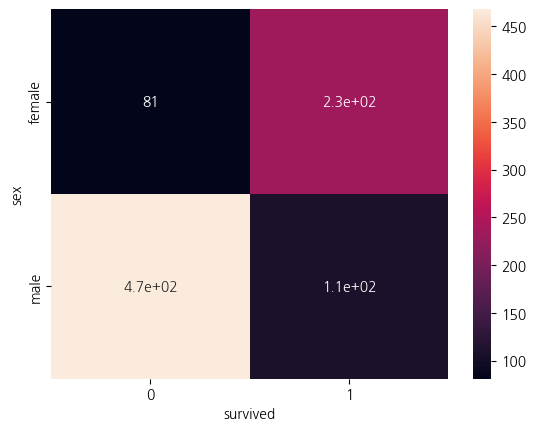

In [ ]:
sns.heatmap(pd.crosstab(titanic['sex'],titanic['survived']),annot=True)

In [ ]:
titanic.groupby(['sex','survived']).size().unstack()

survived,0,1
sex,,
female,81,233
male,468,109


### (2) pairplot

In [ ]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


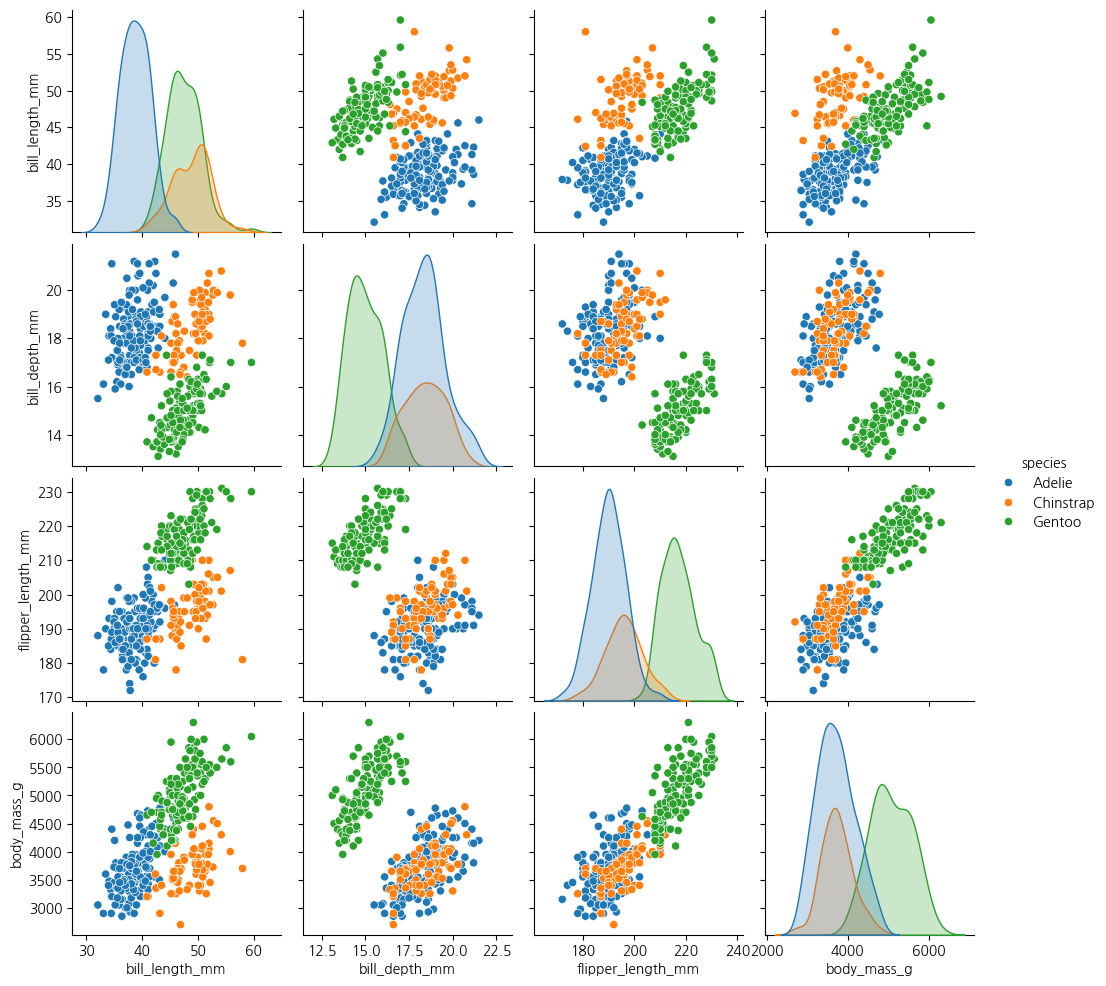

In [ ]:
sns.pairplot(data=penguins,
             diag_kind='kde',
             hue='species')